In [4]:
import pandas as pd

labeled_vectara = pd.read_csv("data/test_labeled_vectara.csv")
labeled_bayes = pd.read_csv("data/test_data_with_predictions.csv")

### Loading Data

In [10]:
labeled_bayes["correct"] = [True if true == pred else False for true, pred in zip(labeled_bayes["label"], labeled_bayes["predicted_label"])]
labeled_vectara["correct"] = [True if true == pred else False for true, pred in zip(labeled_vectara["true_labels"], labeled_vectara["predicted_vectara"])]

### Functions to analyze data quantitatively

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

def detailed_analysis(df_results, true_label_col, pred_label_col, hyp_col, tgt_col):
    # Extracting true and predicted labels
    true_labels = df_results[true_label_col]
    pred_labels = df_results[pred_label_col]

    # Generating classification report
    print("Classification Report:")
    print(classification_report(true_labels, pred_labels))

    # Generating confusion matrix
    print("Confusion Matrix:")
    cm = confusion_matrix(true_labels, pred_labels)
    print(cm)

    # Plotting confusion matrix
    plt.matshow(cm, cmap='Greens')
    plt.title('Confusion Matrix')
    plt.colorbar()
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # Computing average length of hypothesis and target entries
    hyp_lengths = df_results[hyp_col].apply(len)
    tgt_lengths = df_results[tgt_col].apply(len)

    avg_hyp_length = hyp_lengths.mean()
    avg_tgt_length = tgt_lengths.mean()

    print(f"Average Hypothesis Length: {avg_hyp_length:.2f}")
    print(f"Average Target Length: {avg_tgt_length:.2f}")

    # Calculating precision and recall
    tp = cm[1, 1]
    fp = cm[0, 1]
    fn = cm[1, 0]
    tn = cm[0, 0]

    try:
        precision = tp / (tp + fp)
    except ZeroDivisionError:
        precision = 0

    recall = tp / (tp + fn)
    accuracy = (tn + tp) / len(true_labels)

    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"Accuracy: {accuracy:.2f}")

    return {
        'classification_report': classification_report(true_labels, pred_labels, output_dict=True),
        'confusion_matrix': cm,
        'avg_hyp_length': avg_hyp_length,
        'avg_tgt_length': avg_tgt_length,
        'precision': precision,
        'recall': recall
    }

In [18]:
def comparing_lengths(df, hyp_tokens, tgt_tokens):

    correct_df = df[df["correct"] == True]
    incorrect_df = df[df["correct"] == False]

    length_dif_correct = correct_df[tgt_tokens].apply(len) - correct_df[hyp_tokens].apply(len)
    length_dif_incorrect = incorrect_df[tgt_tokens].apply(len) - incorrect_df[hyp_tokens].apply(len)

    mean_dif_cor = length_dif_correct.mean()
    mean_dif_incor = length_dif_incorrect.mean()

    print("Mean Difference for correctly classified sentences:", mean_dif_cor)
    print("Mean Difference for incorrectly classified sentences:", mean_dif_incor)

### Evaluation of Vectara Model

#### Quantitative Evaluation

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.67      0.73       889
           1       0.61      0.73      0.66       611

    accuracy                           0.70      1500
   macro avg       0.70      0.70      0.69      1500
weighted avg       0.71      0.70      0.70      1500

Confusion Matrix:
[[600 289]
 [164 447]]


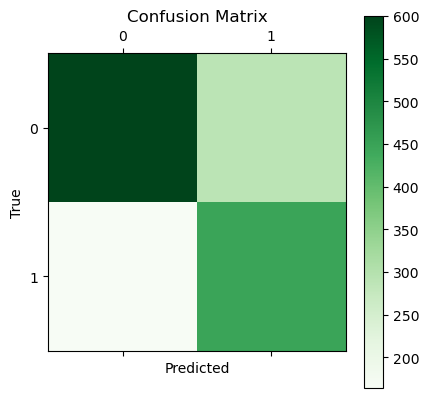

Average Hypothesis Length: 35.05
Average Target Length: 41.45
Precision: 0.61
Recall: 0.73
Accuracy: 0.70


{'classification_report': {'0': {'precision': 0.7853403141361257,
   'recall': 0.6749156355455568,
   'f1-score': 0.7259528130671506,
   'support': 889.0},
  '1': {'precision': 0.6073369565217391,
   'recall': 0.7315875613747954,
   'f1-score': 0.6636971046770601,
   'support': 611.0},
  'accuracy': 0.698,
  'macro avg': {'precision': 0.6963386353289325,
   'recall': 0.7032515984601762,
   'f1-score': 0.6948249588721054,
   'support': 1500.0},
  'weighted avg': {'precision': 0.7128336131345322,
   'recall': 0.698,
   'f1-score': 0.700593987849587,
   'support': 1500.0}},
 'confusion_matrix': array([[600, 289],
        [164, 447]], dtype=int64),
 'avg_hyp_length': 35.04666666666667,
 'avg_tgt_length': 41.45333333333333,
 'precision': 0.6073369565217391,
 'recall': 0.7315875613747954}

In [11]:
detailed_analysis(labeled_vectara, "true_labels", "predicted_vectara", "hyp", "tgt")

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.72      0.76       371
           1       0.56      0.68      0.61       192

    accuracy                           0.71       563
   macro avg       0.69      0.70      0.69       563
weighted avg       0.73      0.71      0.71       563

Confusion Matrix:
[[268 103]
 [ 62 130]]


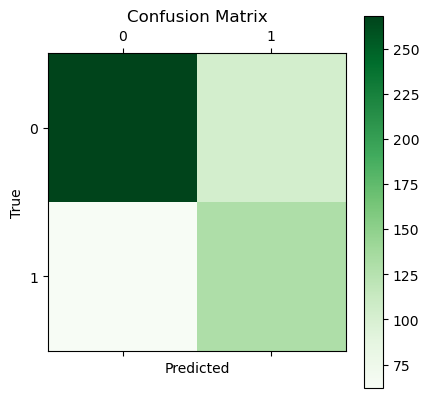

Average Hypothesis Length: 32.75
Average Target Length: 36.69
Precision: 0.56
Recall: 0.68
Accuracy: 0.71


{'classification_report': {'0': {'precision': 0.8121212121212121,
   'recall': 0.7223719676549866,
   'f1-score': 0.7646219686162625,
   'support': 371.0},
  '1': {'precision': 0.5579399141630901,
   'recall': 0.6770833333333334,
   'f1-score': 0.611764705882353,
   'support': 192.0},
  'accuracy': 0.7069271758436945,
  'macro avg': {'precision': 0.6850305631421512,
   'recall': 0.69972765049416,
   'f1-score': 0.6881933372493078,
   'support': 563.0},
  'weighted avg': {'precision': 0.7254377144161333,
   'recall': 0.7069271758436945,
   'f1-score': 0.7124930264405775,
   'support': 563.0}},
 'confusion_matrix': array([[268, 103],
        [ 62, 130]], dtype=int64),
 'avg_hyp_length': 32.746003552397866,
 'avg_tgt_length': 36.685612788632326,
 'precision': 0.5579399141630901,
 'recall': 0.6770833333333334}

In [12]:
detailed_analysis(labeled_vectara[labeled_vectara["task"]=="DM"], "true_labels", "predicted_vectara", "hyp", "tgt")

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.55      0.64       305
           1       0.60      0.82      0.69       257

    accuracy                           0.67       562
   macro avg       0.69      0.68      0.67       562
weighted avg       0.70      0.67      0.67       562

Confusion Matrix:
[[167 138]
 [ 47 210]]


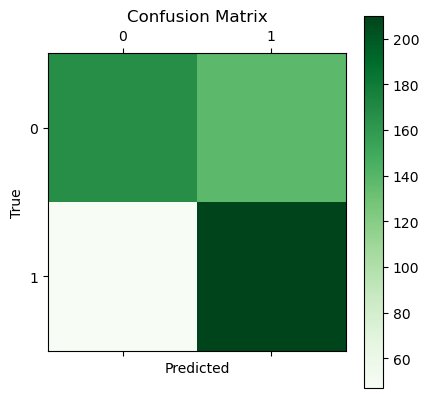

Average Hypothesis Length: 38.86
Average Target Length: 51.09
Precision: 0.60
Recall: 0.82
Accuracy: 0.67


{'classification_report': {'0': {'precision': 0.780373831775701,
   'recall': 0.5475409836065573,
   'f1-score': 0.6435452793834296,
   'support': 305.0},
  '1': {'precision': 0.603448275862069,
   'recall': 0.8171206225680934,
   'f1-score': 0.6942148760330579,
   'support': 257.0},
  'accuracy': 0.6708185053380783,
  'macro avg': {'precision': 0.691911053818885,
   'recall': 0.6823308030873254,
   'f1-score': 0.6688800777082438,
   'support': 562.0},
  'weighted avg': {'precision': 0.6994665935732037,
   'recall': 0.6708185053380783,
   'f1-score': 0.6667162515168006,
   'support': 562.0}},
 'confusion_matrix': array([[167, 138],
        [ 47, 210]], dtype=int64),
 'avg_hyp_length': 38.86120996441281,
 'avg_tgt_length': 51.09252669039146,
 'precision': 0.603448275862069,
 'recall': 0.8171206225680934}

In [13]:
detailed_analysis(labeled_vectara[labeled_vectara["task"]=="MT"], "true_labels", "predicted_vectara", "hyp", "tgt")

#### Analysis of Length Differences

In [ ]:
print("Overall:")
comparing_lengths(labeled_vectara, "hyp_tokens", "tgt_tokens")
print("DM:")
comparing_lengths(labeled_vectara[labeled_vectara["task"]=="DM"], "hyp_tokens", "tgt_tokens")
print("MT:")
comparing_lengths(labeled_vectara[labeled_vectara["task"]=="MT"], "hyp_tokens", "tgt_tokens")
print("PG:")
comparing_lengths(labeled_vectara[labeled_vectara["task"]=="PG"], "hyp_tokens", "tgt_tokens")

#### Qualitative Analysis

In [27]:
incor_inst = labeled_vectara[labeled_vectara["correct"] == False]
incor_inst_mt = incor_inst[incor_inst["task"] == "MT"]
incor_inst_dm = incor_inst[incor_inst["task"] == "DM"]
incor_inst_pg = incor_inst[incor_inst["task"] == "PG"]

In [30]:
def show_problems(df):

    for i in range(len(df)):
        print("Model Output:", df["hyp"].iloc[i])
        print("Correct Output:", df["tgt"].iloc[i])
        print("Correct Label:", df["label"].iloc[i])
        print("\n")

In [31]:
show_problems(incor_inst_dm)

Model Output: Made of twigs or twigs.
Correct Output: Made of twine; having the appearance of twine.
Correct Label: Hallucination


Model Output: (informal) Glamorous.
Correct Output: Marked by glamour or glamorousness; glamorous
Correct Label: Not Hallucination


Model Output: (informal) Fun, exciting.
Correct Output: (slang) Excitingly fun or enticing.
Correct Label: Not Hallucination


Model Output: The act of ungrasping.
Correct Output: The act of ungrasping; the release of something that is grasped.
Correct Label: Not Hallucination


Model Output: (uncountable) The process of making something gender-neutral.
Correct Output: The process or result of genderizing.
Correct Label: Hallucination


Model Output: The fear or dislike of drugs.
Correct Output: The irrational fear or avoidance of a medicine, or of medicines in general.
Correct Label: Not Hallucination


Model Output: (transitive) To undo the damage of.
Correct Output: (transitive) To undo the destruction of; to restore or re